## Exercise 1 - **Many volcanic bomb**

The goal of this exercise is to consolidate:
- vectorisation and element-wise operations using `.`
- random numbers
- array initialisation
- conditional statement

The goal is to extend the volcanic bomb calculator (exercise 4, lecture 1) to handle `nb` bombs.

To do so, start from the script you wrote to predict the trajectory of a single volcanic bomb and extend it to handle `nb` bombs.

Declare a new variable for the number of volcanic bombs

In [6]:
nb = 5 # number of volcanic bombs

5

Then, replace the vertical angle of ejection α to randomly vary between 60° and 120° with respect to the horizon for each bomb. Keep the magnitude of the ejection velocity as before, i.e. $V=120$ m/s.

In [30]:
Δt = 0.1
xi, yi = 0., 480.
V_abs_i = 120.
α_i = 60.
g = 9.8

vx(α) = V_abs_i*cosd(α)
vy(α) = V_abs_i*sind(α)

T = Float64[0]

nextT() = T[end] + Δt

function Bomb()
    (X=Float64[xi],
    Y=Float64[yi],
    A=Float64[α_i],
    Vx=Float64[vx(α_i)],
    Vy=Float64[vy(α_i)])
end

function adv_bomb(b)
    X,Y,A,Vx,Vy = [getproperty(b,prop) for prop=[:X,:Y,:A,:Vx,:Vy]]
    nextx() = X[end] + Vx[end]*Δt
    nexty() = Y[end] + Vy[end]*Δt
    nextA() = randn()*(120-60)/2+(120+160/2)
    nextVx() = vx(A[end])
    nextVy() = vy(A[end]) - g*Δt
    for (funref,state)=zip(
        Ref.([nextx,nexty,nextA,nextVx,nextVy]),
        [X,Y,A,Vx,Vy]
    )
        funref = Ref(() -> if Y[end] > 0 
            funref[]()
        else
            state[end]
        end)
    end

    
    push!(X, nextx())
    push!(Y, nexty())
    push!(A, nextA())
    push!(Vx, nextVx())
    push!(Vy, nextVy())
end

bombs = [Bomb() for _ in 1:nb]

while reduce(|,last.(getproperty.(bombs,:Y)) .> 0)
    push!(T, nextT())
    adv_bomb.(bombs)
end

> 💡 hint: Use the `randn()` function to generate random numbers normally distributed.

All bombs have the same initial location $(x=0, y=480)$ as before.

Implement the necessary modifications in the time loop in order to update the position of all volcanic bombs correctly.

Ensure the bombs stop their motion once they hit the ground (at position $y=0$).

### Question 1

Report the total time it takes for the last, out of 5, volcanic bombs to hit the ground and provide a figure that visualise the bombs' overall trajectories.

### Question 2

Repeat the exercise 1 but vectorise all your code, i.e. make use of broadcasting capabilities in Julia (using `.` operator) to only have a single loop for advancing in time.

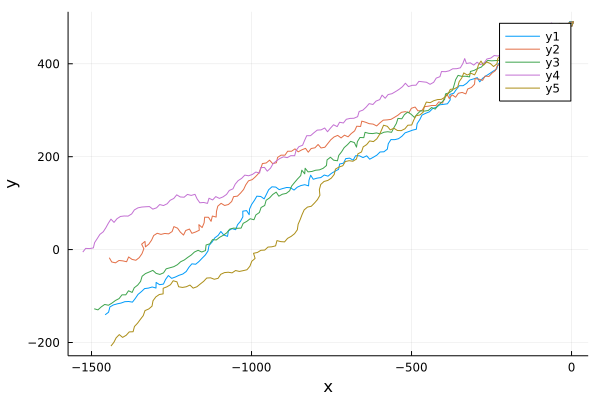

In [31]:
#q1
using Plots
plot()
for b=bombs
    plot!(b.X,b.Y,xlabel="x", ylabel="y")
end
display(plot!())